# Data Wrangling – Predicting Catalog Demand

### by Travis Gillespie

## Table of Contents
- [Introduction](#intro)
- [Gather Data](#gather)
- [Assess Data](#assess)
   - [Quality](#quality)
   - [Tidiness](#tidiness)
- [Clean Data](#clean)
- [Analyze, and Visualize](#analyzing)
   - [Insight One: Correlation](#one)
   - [Insight Two: Linear Regression with Dummies](#two)
   - [Insight Three: Calculations](#three)
- [Store Data](#store)
- [Initial Discovery Items](#discovery)
- [Resources](#resources)

<a id='intro'></a>
## Introduction

This file contains the code used to gather, assess, clean, analyze, and visualize the data used to write up my report.

<a id='gather'></a>
## Gathering Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
# %matplotlib inline
# import requests
# import tweepy
# import json
# import time
# import sys
# import re
# from datetime import datetime, timedelta

In [2]:
# p1-customers.xlsx - This dataset includes the following information on about 2,300 customers. Important: You should build your model on this dataset and not p1-mailinglist.xlsx.
df_customers_original = pd.read_excel("./assets/data/p1-customers.xlsx")

# p1-mailinglist.xlsx - This dataset is the 250 customers that you need to predict sales. This is the list of customers that the company would send a catalog to. Use this dataset to estimate how much revenue the company can expect if they send out the catalog. It includes all of the fields from P1_Customers.xlsx except for Responded_to_Last_Catalog so this variable cannot be used in the linear regression model since it could not be applied to the mailing list data set. It also includes two additional variables.
    # Score_No: The probability that the customer WILL NOT respond to the catalog and not make a purchase.
    # Score_Yes: The probability that the customer WILL respond to the catalog and make a purchase.
df_mailingList_original = pd.read_excel("./assets/data/p1-mailinglist.xlsx")

In [3]:
df_customers = df_customers_original.copy()
df_mailingList = df_mailingList_original.copy()

<a id='assess'></a>
## Assessing Data

<a id='quality'></a>
### Quality

As noted in the project details, the data provided is clean and does not require preparation. Therefore there are not any records that need to be reomved or data types that need to be modified; as shown using the _.info()_ function.

In [4]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
Name                          2375 non-null object
Customer_Segment              2375 non-null object
Customer_ID                   2375 non-null int64
Address                       2375 non-null object
City                          2375 non-null object
State                         2375 non-null object
ZIP                           2375 non-null int64
Avg_Sale_Amount               2375 non-null float64
Store_Number                  2375 non-null int64
Responded_to_Last_Catalog     2375 non-null object
Avg_Num_Products_Purchased    2375 non-null int64
#_Years_as_Customer           2375 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 222.7+ KB


In [5]:
df_mailingList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
Name                          250 non-null object
Customer_Segment              250 non-null object
Customer_ID                   250 non-null int64
Address                       250 non-null object
City                          250 non-null object
State                         250 non-null object
ZIP                           250 non-null int64
Store_Number                  250 non-null int64
Avg_Num_Products_Purchased    250 non-null int64
#_Years_as_Customer           250 non-null float64
Score_No                      250 non-null float64
Score_Yes                     250 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 23.5+ KB


In [6]:
df_customers.head(3)

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3


In [7]:
df_mailingList.head(3)

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882


In [8]:
list(df_customers.columns.values)

# Customer_Segment
# Customer_ID
# Responded_to_Last_Catalog
# Avg_Sale_Amount
# Avg_Num_Products_Purchased
# _Years_as_Customer
# Store_Number

['Name',
 'Customer_Segment',
 'Customer_ID',
 'Address',
 'City',
 'State',
 'ZIP',
 'Avg_Sale_Amount',
 'Store_Number',
 'Responded_to_Last_Catalog',
 'Avg_Num_Products_Purchased',
 '#_Years_as_Customer']

In [9]:
list(df_mailingList.columns.values)

['Name',
 'Customer_Segment',
 'Customer_ID',
 'Address',
 'City',
 'State',
 'ZIP',
 'Store_Number',
 'Avg_Num_Products_Purchased',
 '#_Years_as_Customer',
 'Score_No',
 'Score_Yes']

In [10]:
# df_joined = df_customers.merge(df_mailingList, suffixes=['_Customers', '_mailingList'], left_on='Name', right_on='Name', how = 'outer')
# scorecard_joined = scorecard_joined.merge(df_gainsight_activity_pivoted, suffixes=['_x', '_y'], left_on='User Name', right_on='Success Manager Name', how = 'left')
# df_joined.head()


<a id='tidiness'></a>
### Tidiness

Create dummy variables for Customer_Segment column

In [11]:
# dropping first column "Credit Card Only"... define that category will be my baseline
# customerSegment_dummies = pd.get_dummies(df_customers.Customer_Segment, prefix='Customer_Segment').iloc[:,1:]
# customerSegment_dummies.head(3)

df_customers_dummies = pd.get_dummies(df_customers, columns = ["Customer_Segment"], drop_first = True)

df_customers_dummies.rename(index=str, columns={"Customer_Segment_Loyalty Club Only": "Customer_Segment_Loyalty_Club_Only",
                              "Customer_Segment_Loyalty Club and Credit Card": "Customer_Segment_Loyalty_Club_and_Credit_Card",
                              "Customer_Segment_Store Mailing List": "Customer_Segment_Store_Mailing_List"}, inplace = True)

df_customers_dummies.head(3)


,Name,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Customer_Segment_Loyalty_Club_Only,Customer_Segment_Loyalty_Club_and_Credit_Card,Customer_Segment_Store_Mailing_List
0,Pamela Wright,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6,0,0,1
1,Danell Valdez,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6,0,0,1
2,Jessica Rinehart,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3,0,0,1


In [12]:
# df_mailingList

df_mailingList_dummies = pd.get_dummies(df_mailingList, columns = ["Customer_Segment"], drop_first = True)

df_mailingList_dummies.rename(index=str, columns={"Customer_Segment_Loyalty Club Only": "Customer_Segment_Loyalty_Club_Only",
                              "Customer_Segment_Loyalty Club and Credit Card": "Customer_Segment_Loyalty_Club_and_Credit_Card",
                              "Customer_Segment_Store Mailing List": "Customer_Segment_Store_Mailing_List"}, inplace = True)


<a id='clean'></a>
## Cleaning Data

The datasets provided for this project were already clean. No further cleanup was required.

<a id='analyzing'></a>
## Analyzing, and Visualizing Data

<a id='one'></a>
### Insight One: Correlation

In [13]:
# COLORMAPS

# use cmap to set the chart colors
cmap = sns.choose_colorbrewer_palette(data_type = "d") # set data_type to d, q, or s

interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

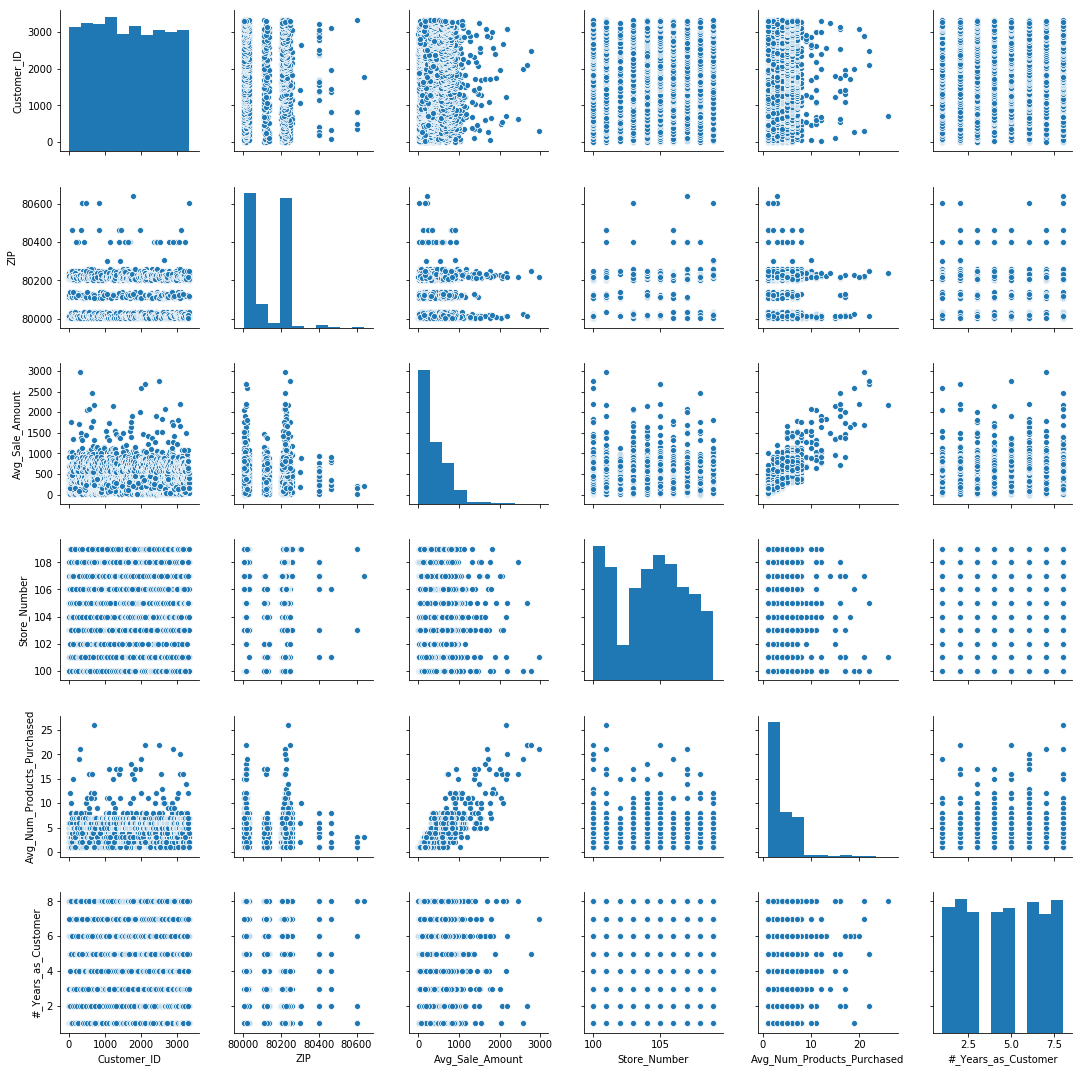

In [14]:
# sns.regplot(x="Avg_Num_Products_Purchased", y="Avg_Sale_Amount", data=df_customers);

# deleteletes = df_customers["Avg_Sale_Amount"].unique()

# for i in deleteletes:
#     print(i)

sns.pairplot(df_customers)
plt.savefig('./assets/images/pairplot_df_Customers', dpi = 300)


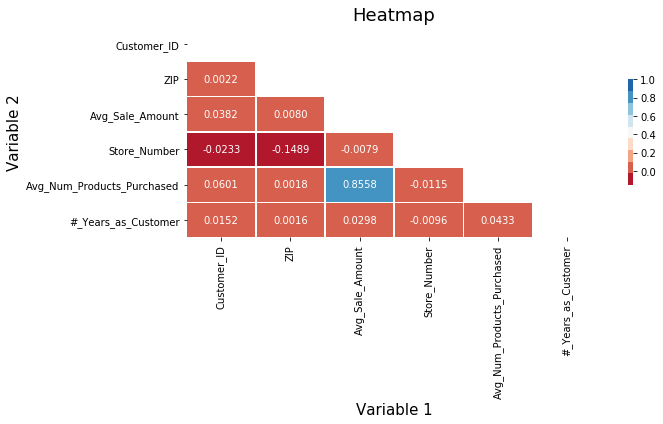

In [15]:
# CORRELATION MATRIX


corr = df_customers.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt='.4f',
            cmap=cmap, cbar=True, ax=ax, mask = mask,
            square=False, linewidths=.5,cbar_kws={"shrink": .5})
ax.set_title('Heatmap', fontsize = 18)
ax.set_xlabel('Variable 1', fontsize = 15)
ax.set_ylabel('Variable 2', fontsize = 15)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal", fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10)
plt.tight_layout()
plt.savefig('./assets/images/pearsonCorrelation', dpi = 300, bbox_inches='tight', pad_inches=0.0)
plt.show()


# MARKDOWN RESPONSE
# I needed help masking the parallel values within this heatmap 9 . Notice the pearson correlation coifficient between retweet count and favorite count (0.9276) is easy to spot when compared to a normal heatmap correlation matrix that duplicates values. This is considered a strong positive correlation.

In [16]:
# https://code.i-harness.com/en/q/186322a
from scipy.stats import pearsonr
pearsonr(df_customers["Avg_Sale_Amount"], df_customers["Avg_Num_Products_Purchased"])



(0.8557542170755578, 0.0)

The pair plot and Pearson Correlation matrix suggests *Avg_Sale_Amount* and *Avg_Num_Products_Purchased* have a strong positive correlation of approximately 0.8558.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


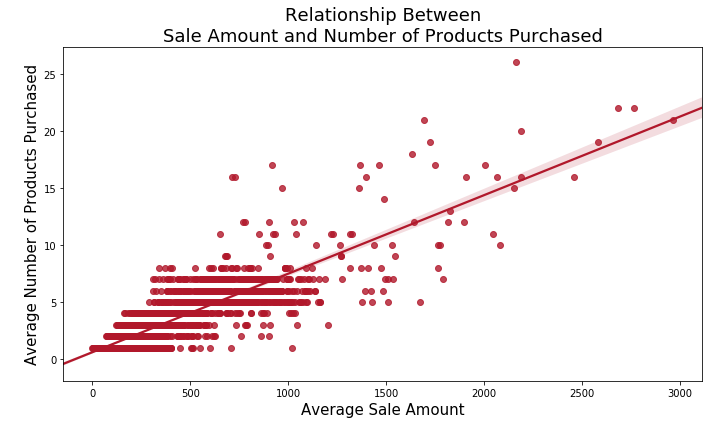

In [17]:
# SCATTER PLOT

plt.figure(figsize=(10, 6))
sns.regplot(data = df_customers, x = "Avg_Sale_Amount", y = "Avg_Num_Products_Purchased", 
            ci = 95, color = cmap[0])
plt.title('Relationship Between\nSale Amount and Number of Products Purchased', fontsize = 18)
plt.xlabel('Average Sale Amount', fontsize = 15)
plt.ylabel('\nAverage Number of Products Purchased', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.savefig('./assets/images/scatterPlot.png', dpi = 300)
plt.show()
# help(sns.regplot)

#  MARKDOWN RESPONSE
# This graph displays a positive correlation between retweet count and favorite count.

The scatter plot clearly displays the relationship between *Avg_Sale_Amount* and *Avg_Num_Products_Purchased* as a positive correlation.

Note: I'm not sure why this scatter plot has a *Future Warning*. It looks like it is in regards a tuples issue. I have not encoutered this issue in the past and will need to conduct further investigation to understand why this is occuring, and how to avoid it in the future.

Now to code dummies for the categorical variables.

In [18]:
# analysis w/ dummies
df_customers_dummies.head(3)

,Name,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer,Customer_Segment_Loyalty_Club_Only,Customer_Segment_Loyalty_Club_and_Credit_Card,Customer_Segment_Store_Mailing_List
0,Pamela Wright,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6,0,0,1
1,Danell Valdez,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6,0,0,1
2,Jessica Rinehart,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3,0,0,1


In [19]:
# df_customers_dummies.columns

<a id='two'></a>
### Insight Two: Linear Regression with Dummies

In [20]:
# # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html


# from scipy import stats


# x = df_customers_dummies["Avg_Sale_Amount"]
# y = df_customers_dummies["Avg_Num_Products_Purchased"]

# slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# print("slope: %f    intercept: %f" % (slope, intercept))

Now to run linear regression for categorical predictors.

In [21]:
regFormulaDummies = """Avg_Sale_Amount ~ Avg_Num_Products_Purchased +
                       Customer_Segment_Loyalty_Club_Only +
                       Customer_Segment_Loyalty_Club_and_Credit_Card +
                       Customer_Segment_Store_Mailing_List"""

reg = smf.ols(formula = regFormulaDummies, 
              data = df_customers_dummies).fit()
reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     3040.
Date:                Fri, 04 Jan 2019   Prob (F-statistic):               0.00
Time:                        01:22:00   Log-Likelihood:                -15061.
No. Observations:                2375   AIC:                         3.013e+04
Df Residuals:                    2370   BIC:                         3.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                       303.4635     10.576     28.694      0.000     282.725     324.202
Avg_Num_Products_Purchased                       66.9762      1.515     44.208      0.000      64.005      69.947
Customer_Segment_Loyalty_Club_Only             -149.3557      8.973    -16.645      0.000    -166.951    -131.760
Customer_Segment_Loyalty_Club_and_Credit_Card   281.8388     11.910     23.664      0.000     258.484     305.194
Customer_Segment_Store_Mailing_List            -245.4177      9.768    -25.125      0.000    -264.572    -226.263
==============================================================================
Omnibus:                      359.638   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4770.580
Skew:                           0.232   Prob(JB):                         0.00
Kurtosis:                       9.928   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# rounding coefficients to two decimal places

coef_Intercept = round(303.4635, 2) # Intercept
coef_Avg_Products_Purchased = round(66.9762,2) # Avg_Num_Products_Purchased
coef_Club_Only = round(-149.3557,2) # Customer_Segment_Loyalty_Club_Only
coef_Customer_Club_and_Card = round(281.8388,2) # Customer_Segment_Loyalty_Club_and_Credit_Card
coef_Mail_List = round(-245.4177,2) # Customer_Segment_Store_Mailing_List

Now let's calculate the best linear regression equation based on the available data.

In [23]:
# Multiple Linear Regression equation
# y = b0 + b1x1 + b2x2 + b3x3

$PredictedAverage Sale Amount \space = \space 303.46\space+\space$<br>$
$$
(66.98  \space\times\space$
<span style = "color : DodgerBlue "> $AvgNumProductsPurchased$</span>
$)\space+\space$<br>$
$$
($ -$149.36 \space\times\space$
<span style = "color : DodgerBlue "> $CustomerSegmentLoyaltyClubOnly$</span>
$)\space+\space$<br>$
$$
(281.84 \space\times\space$
<span style = "color : DodgerBlue "> $CustomerSegmentLoyaltyClubAndCreditCard$</span>
$)\space+\space$<br>$
$$
($ -$245.42 \space\times\space$
<span style = "color : DodgerBlue "> $CustomerSegmentStoreMailingList$</span>


<a id='three'></a>
### Insight Three: Calculations

*Predicted_Average_Sale_Amount* is calculated by following the *PredictedAverageSaleAmount* formula above. Substitute the formula's variables with corresponding column values for each of the 250 customers in the mailing list dataset. Finally sum the *Predicted_Average_Sale_Amount* values.

Example Formula
```Python
PredictedAverageSaleAmount = 303.46 +
                             (66.98 × AvgNumProductsPurchased) +
                             (- 149.36 × CustomerSegmentLoyaltyClubOnly) +
                             (281.84 × CustomerSegmentLoyaltyClubAndCreditCard) +
                             (- 245.42 × CustomerSegmentStoreMailingList)
```

In [24]:
df_mailingList_dummies["Predicted_Average_Sale_Amount"] = coef_Intercept + (coef_Avg_Products_Purchased * df_mailingList_dummies["Avg_Num_Products_Purchased"]) + (coef_Club_Only * df_mailingList_dummies["Customer_Segment_Loyalty_Club_Only"]) + (coef_Customer_Club_and_Card * df_mailingList_dummies["Customer_Segment_Loyalty_Club_and_Credit_Card"]) + (coef_Mail_List * df_mailingList_dummies["Customer_Segment_Store_Mailing_List"])


In [25]:
predictedAverageSaleAmount_Overall = sum(df_mailingList_dummies["Predicted_Average_Sale_Amount"])
predictedAverageSaleAmount_Overall = round(predictedAverageSaleAmount_Overall, 2)
predictedAverageSaleAmount_Overall


138295.16

*Predicted_Revenue* is calculated by finding the product of *PredictedAverageSaleAmount* and *Score_Yes* (the probability a customer will respond and make a purchase), then taking the sum of all those values.

Example Formula
```Python
    Predicted_Revenue = Predicted_Average_Sale_Amount * Score_Yes
```

In [26]:
df_mailingList_dummies["Predicted_Revenue"] = df_mailingList_dummies["Predicted_Average_Sale_Amount"] * df_mailingList_dummies["Score_Yes"]


In [27]:
predictedRevenue_Overall = sum(df_mailingList_dummies["Predicted_Revenue"])
predictedRevenue_Overall = round(predictedRevenue_Overall, 2)
predictedRevenue_Overall


47225.91

*Predicted_Profit* is calculated by subtracting the catalog cost (given $6.50) from the product of *Predicted_Revenue* and average gross margin (which is a given value of 50%).


Example Formula
```Python
    Predicted_Profit = (0.5 * Predicted_Revenue) - 6.5
```

In [28]:
df_mailingList_dummies["Predicted_Profit"] = (0.5 * df_mailingList_dummies["Predicted_Revenue"]) - 6.5


In [29]:
predictedProfit_Overall = sum(df_mailingList_dummies["Predicted_Profit"])
predictedProfit_Overall = round(predictedProfit_Overall, 2)
predictedProfit_Overall


21987.96

Overall *Predicted_Profit* can also be calculated by taking half of the overall *Predicted_Revenue* and subtracting the product of 250 customers and $6.50 catalog cost.



In [30]:
(0.5 * predictedRevenue_Overall) - (6.5*250)

21987.955

In [31]:
df_mailingList_dummies.head(3)


,Name,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Customer_Segment_Loyalty_Club_Only,Customer_Segment_Loyalty_Club_and_Credit_Card,Customer_Segment_Store_Mailing_List,Predicted_Average_Sale_Amount,Predicted_Revenue,Predicted_Profit
0,A Giametti,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,1,0,0,355.04,108.299913,47.649956
1,Abby Pierson,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,0,1,0,987.18,466.664208,226.832104
2,Adele Hallman,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,1,0,0,622.96,360.620237,173.810119


In [32]:
def formay(x):
    return "${:,.2f}".format((x))


d = {'Variable Name':['Overall Predicted Average Sale Amount', 'Overall Predicted Revenue', 'Overall Predicted Profit'],
     'Values':[predictedAverageSaleAmount_Overall,predictedRevenue_Overall,predictedProfit_Overall]
    }

df_overallValues = pd.DataFrame(data = d)
    
df_overallValues['Values'] = df_overallValues['Values'].apply(formay)

df_overallValues


,Variable Name,Values
0,Overall Predicted Average Sale Amount,"$138,295.16"
1,Overall Predicted Revenue,"$47,225.91"
2,Overall Predicted Profit,"$21,987.96"


<a id='store'></a>
## Store Data

In [33]:
df_mailingList_dummies.to_csv("./assets/data/df_mailingList_dummies.csv", index = False)
df_customers_dummies.to_csv("./assets/data/df_customers_dummies.csv", index = False)
df_overallValues.to_csv("./assets/data/df_overallValues.csv", index = False)


<a id='discovery'></a>
## Initial Discovery

The following items were used during my initial discovery. Although I did not reference these items in my report. I enjoyed playing around with these different models and decided to keep them in my submission for future reference.

In [34]:
df_customers.groupby('Store_Number')["Customer_Segment"].describe()

,count,unique,top,freq
Store_Number,,,,
100,326,4,Store Mailing List,151
101,276,4,Store Mailing List,133
102,85,4,Store Mailing List,42
103,225,4,Store Mailing List,102
104,270,4,Store Mailing List,128
105,305,4,Store Mailing List,142
106,283,4,Store Mailing List,129
107,226,4,Store Mailing List,96
108,210,4,Store Mailing List,109


In [35]:
round(df_customers_dummies.describe(),1)


,Customer_ID,ZIP,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Customer_Segment_Loyalty_Club_Only,Customer_Segment_Loyalty_Club_and_Credit_Card,Customer_Segment_Store_Mailing_List
count,2375.0,2375.0,2375.0,2375.0,2375.0,2375.0,2375.0,2375.0,2375.0
mean,1647.8,80123.3,399.8,104.3,3.3,4.5,0.2,0.1,0.5
std,962.7,107.3,340.1,2.8,2.7,2.3,0.4,0.3,0.5
min,2.0,80002.0,1.2,100.0,1.0,1.0,0.0,0.0,0.0
25%,820.5,80014.0,168.9,101.0,1.0,2.0,0.0,0.0,0.0
50%,1629.0,80123.0,281.3,105.0,3.0,5.0,0.0,0.0,0.0
75%,2492.5,80221.0,572.4,107.0,5.0,6.0,0.0,0.0,1.0
max,3335.0,80640.0,2963.5,109.0,26.0,8.0,1.0,1.0,1.0


In [36]:
calcPears_A = df_customers.corr(method = 'pearson')
print("Corr Method A:")
print(calcPears_A)
print()
print("Corr Method B:")

Corr Method A:
                            Customer_ID       ZIP  Avg_Sale_Amount  \
Customer_ID                    1.000000  0.002159         0.038235   
ZIP                            0.002159  1.000000         0.007973   
Avg_Sale_Amount                0.038235  0.007973         1.000000   
Store_Number                  -0.023323 -0.148906        -0.007946   
Avg_Num_Products_Purchased     0.060136  0.001790         0.855754   
#_Years_as_Customer            0.015164  0.001643         0.029782   

                            Store_Number  Avg_Num_Products_Purchased  \
Customer_ID                    -0.023323                    0.060136   
ZIP                            -0.148906                    0.001790   
Avg_Sale_Amount                -0.007946                    0.855754   
Store_Number                    1.000000                   -0.011525   
Avg_Num_Products_Purchased     -0.011525                    1.000000   
#_Years_as_Customer            -0.009573                    0.

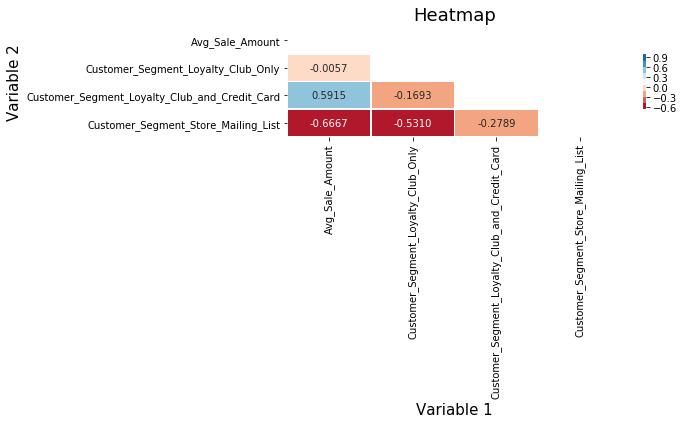

In [37]:
# CORRELATION MATRIX


corr = df_customers_dummies[["Avg_Sale_Amount", 
                             "Customer_Segment_Loyalty_Club_Only",
                             "Customer_Segment_Loyalty_Club_and_Credit_Card",
                             "Customer_Segment_Store_Mailing_List"
                            ]].corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt='.4f',
            cmap=cmap, cbar=True, ax=ax, mask = mask,
            square=False, linewidths=.5,cbar_kws={"shrink": .5})
ax.set_title('Heatmap', fontsize = 18)
ax.set_xlabel('Variable 1', fontsize = 15)
ax.set_ylabel('Variable 2', fontsize = 15)
ax.set_yticklabels(ax.get_yticklabels(), rotation="horizontal", fontsize = 10)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10)
plt.tight_layout()
# plt.savefig('./assets/images/pearsonCorrelation', dpi = 300, bbox_inches='tight', pad_inches=0.0)
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


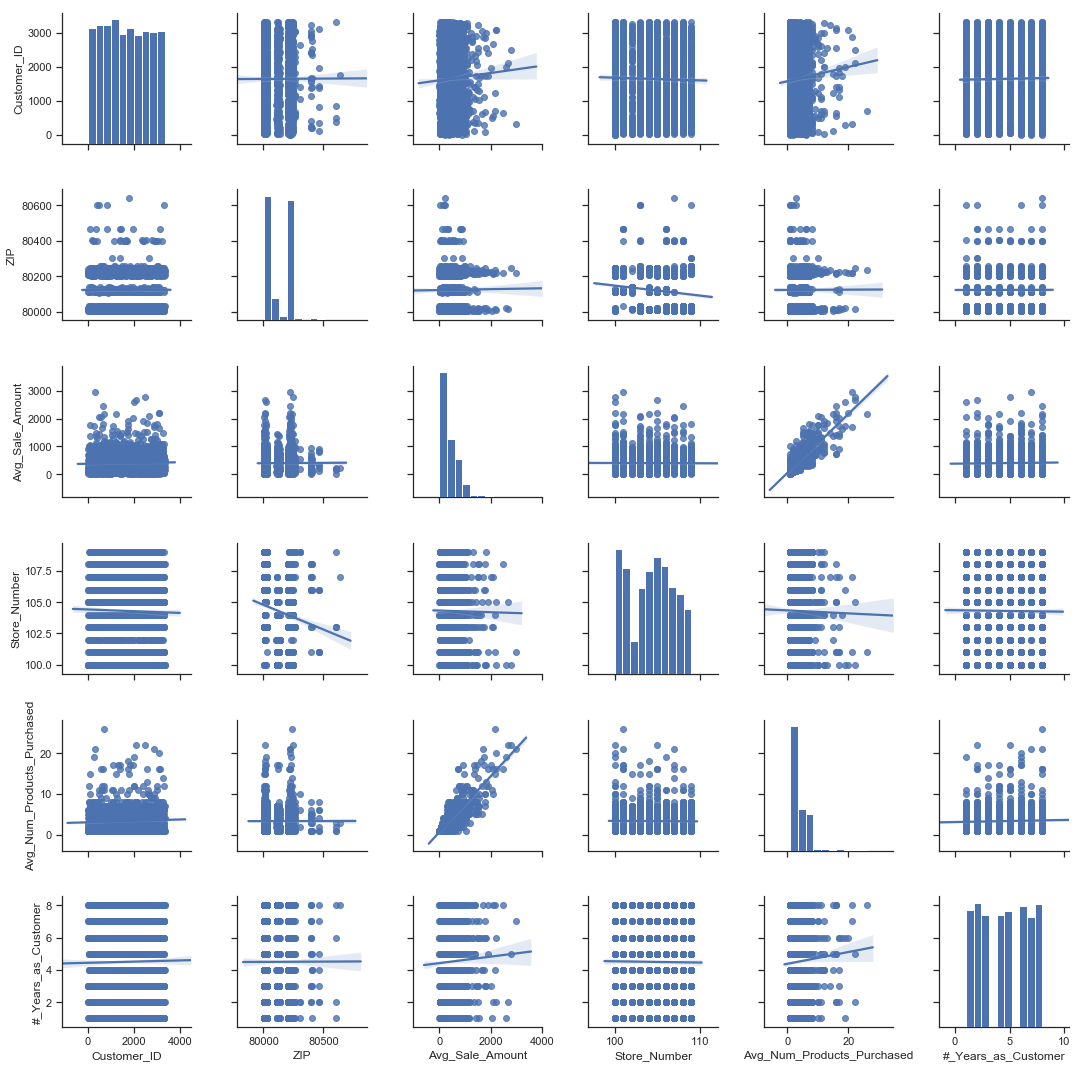

In [38]:
sns.set(style="ticks")
sns.pairplot(df_customers, kind="reg")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


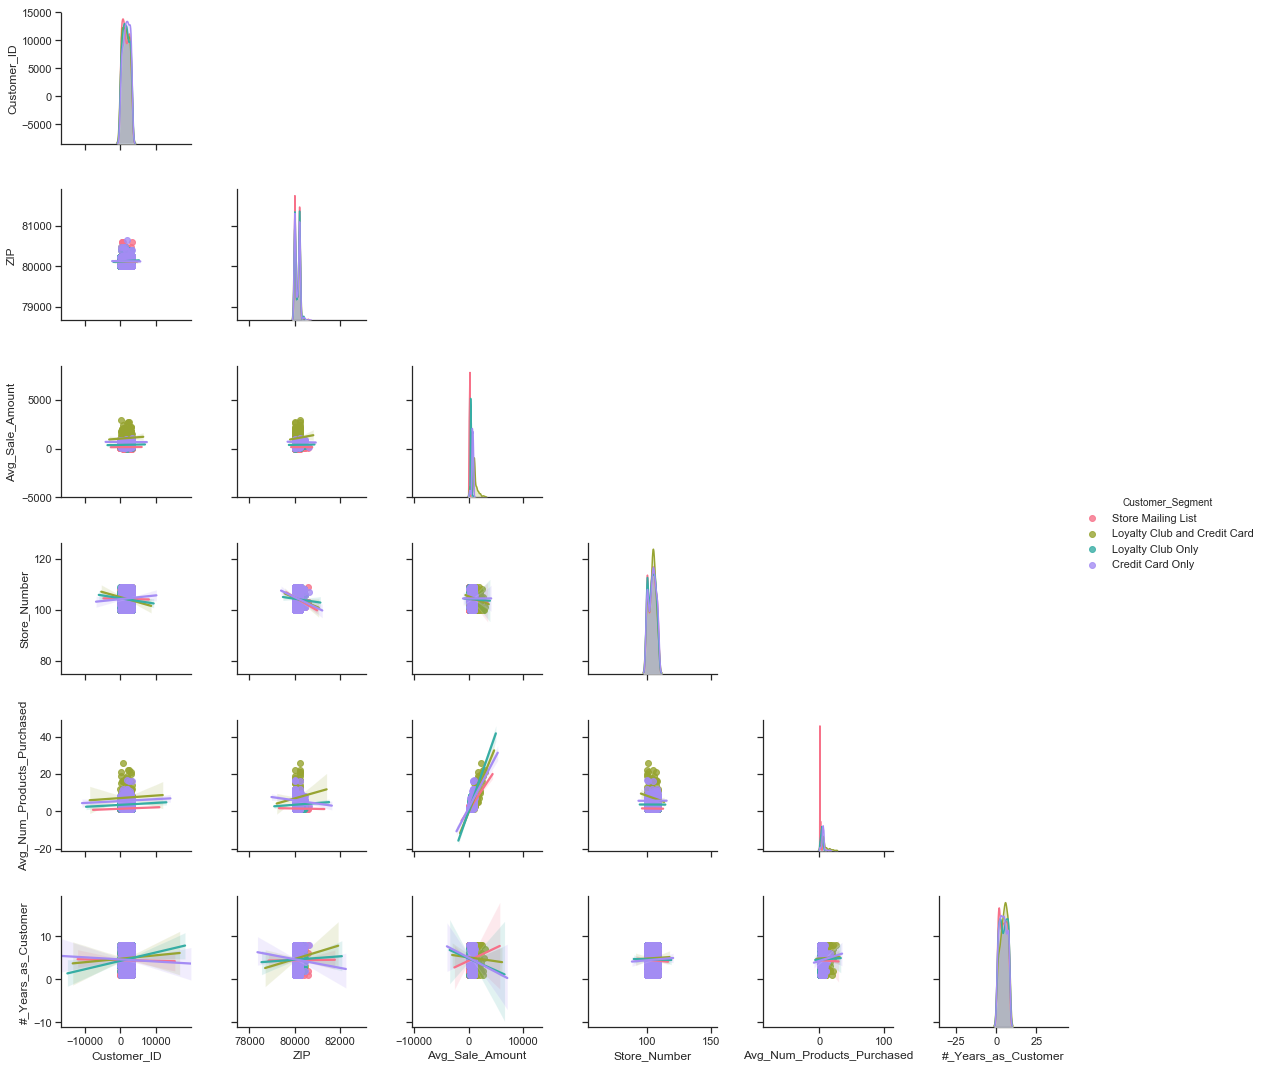

In [39]:
sns.set(style="ticks")
g = sns.pairplot(df_customers, hue="Customer_Segment",kind="reg", palette="husl")

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


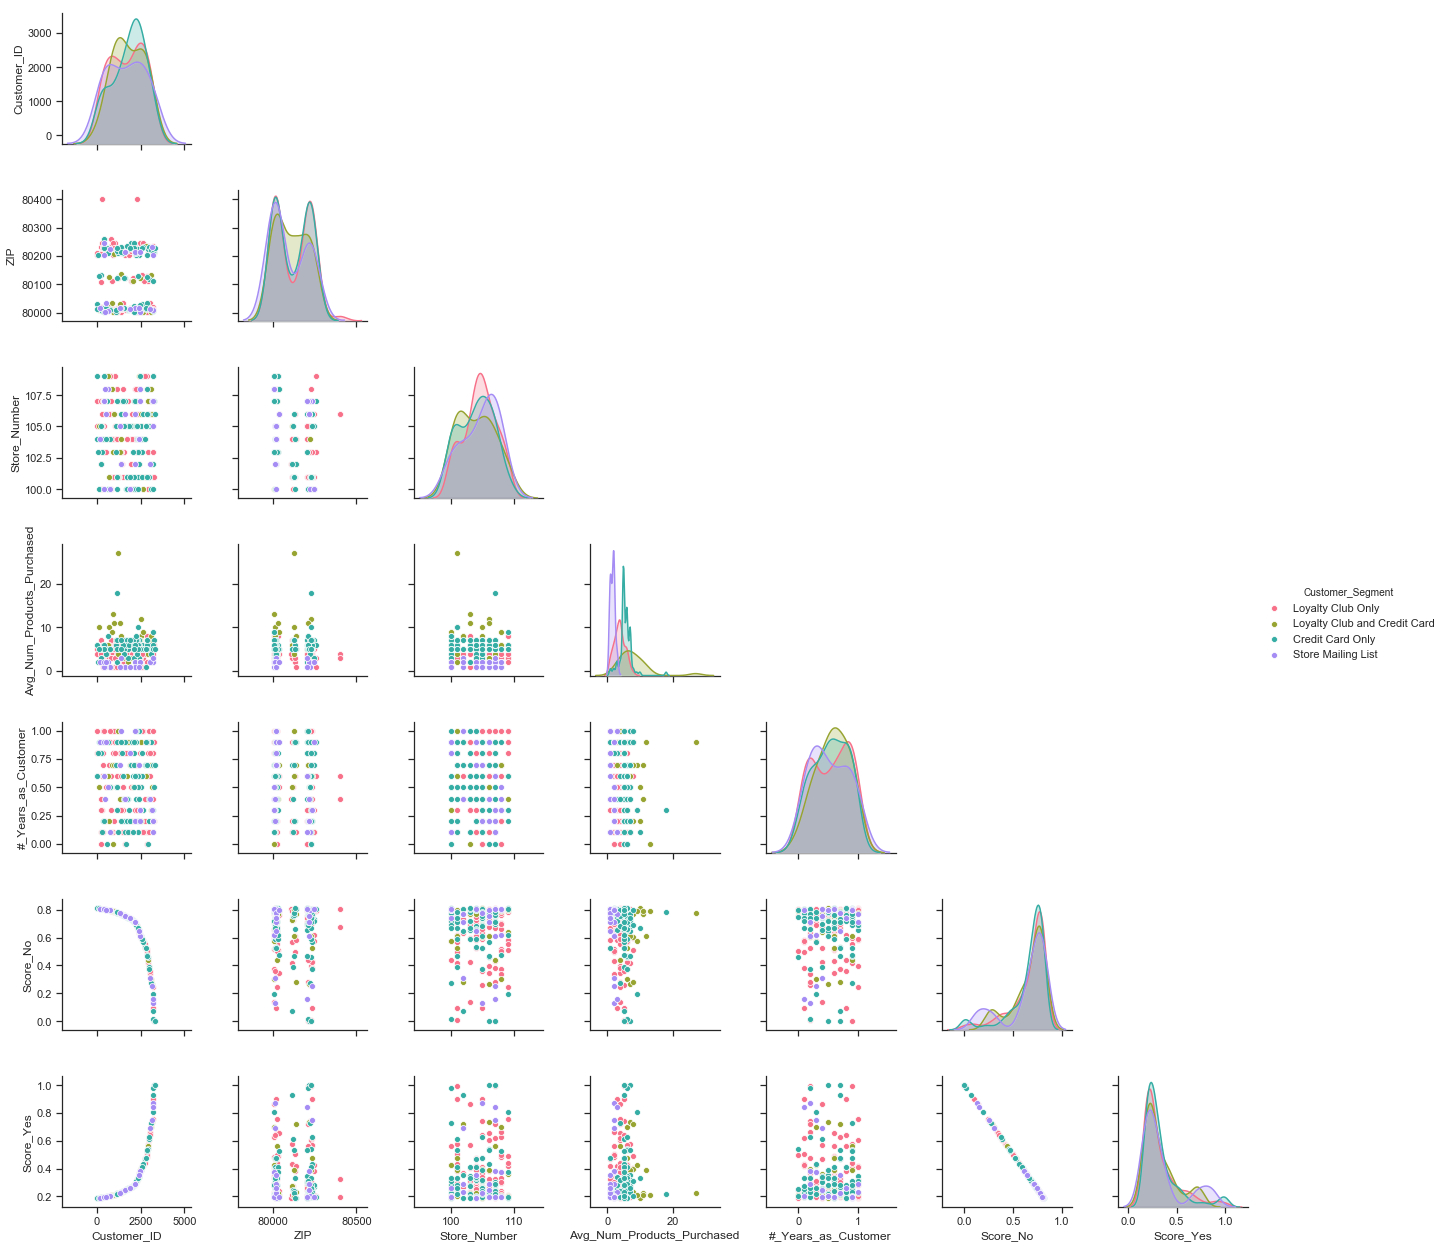

In [40]:
sns.set(style="ticks")
g = sns.pairplot(df_mailingList, hue="Customer_Segment", palette="husl")

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

<a id='resources'></a>
## Resources

1. [Dummy Variables in Pandas](https://youtu.be/0s_1IsROgDc)

* [SciPy Docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

* [Regression in Python](http://songhuiming.github.io/pages/2017/01/21/linear-regression-in-python-chapter-3-regression-with-categorical-predictors/)

* [Multiple Linear Regression](https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9)